Importing the Dependencies

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


lr = LinearRegression()
rr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb = xgb.XGBRegressor()

import pickle


import warnings
warnings.filterwarnings('ignore')

Data Collections and Processing

In [103]:
# Loading Dataset from csv file
ds=pd.read_csv('dataset.csv')

In [104]:
#Inspecting first 5 rows in Dataset
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Bs_version
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,bs3
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,bs3
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,bs4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,bs3
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,bs3


In [105]:
#Getting information of dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       306 non-null    object 
 1   Year           306 non-null    int64  
 2   Selling_Price  300 non-null    float64
 3   Present_Price  306 non-null    float64
 4   Kms_Driven     306 non-null    int64  
 5   Fuel_Type      306 non-null    object 
 6   Seller_Type    306 non-null    object 
 7   Transmission   306 non-null    object 
 8   Owner          306 non-null    int64  
 9   Bs_version     306 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 24.0+ KB


In [106]:
ds.shape

(306, 10)

In [107]:
ds.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,306.000000,300.000000,306.000000,306.000000,306.000000
mean,2013.614379,4.675667,7.675033,37170.346405,0.042484
std,2.891761,5.085175,8.584846,38700.259478,0.245936
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.295000,15000.250000,0.000000
50%,2014.000000,3.625000,6.760000,32661.000000,0.000000
75%,2016.000000,6.000000,9.900000,48941.750000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:>

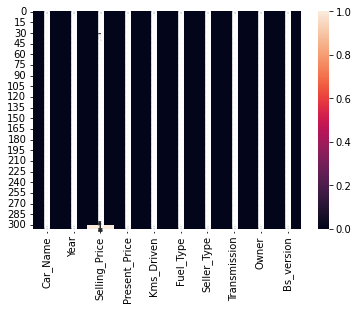

In [108]:
sns.heatmap(ds.isna(),annot=True)

In [109]:
# Drop null value because it is less then 5%
ds=ds.dropna()

In [110]:
#checking number of missing values
ds.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Bs_version       0
dtype: int64

In [111]:
# checking the distribution of categorical data
print(ds.Fuel_Type.value_counts())
print(ds.Seller_Type.value_counts())
print(ds.Transmission.value_counts())
print(ds.Bs_version.value_counts())

Petrol    238
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    105
Name: Seller_Type, dtype: int64
Manual       260
Automatic     40
Name: Transmission, dtype: int64
bs3    264
bs4     36
Name: Bs_version, dtype: int64


#### there so many car name so we can not use car name to predict selling price becz there are many numbers of cars

In [112]:
final_dataset=ds[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',"Bs_version"]]

In [113]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Bs_version
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,bs3
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,bs3
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,bs4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,bs3
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,bs3


In [114]:
#Adding current year for predictions
final_dataset['Current_year']=2022
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Bs_version,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,bs3,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,bs3,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,bs4,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,bs3,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,bs3,2022


#### To drive no_year to find selling price we used feature engneering to creat new column No_year using year and current_year column

In [115]:
final_dataset['No_years']=final_dataset['Current_year']-final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Bs_version,Current_year,No_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,bs3,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,bs3,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,bs4,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,bs3,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,bs3,2022,8


# Droping year and Current_year  column becz now it off no use

In [116]:
final_dataset.drop(['Year','Current_year'],axis=1,inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Bs_version,No_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,bs3,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,bs3,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,bs4,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,bs3,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,bs3,8


In [117]:
# encoding "Fuel_Type" Column
final_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
final_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
final_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "Bs_version" Column
final_dataset.replace({'Bs_version':{'bs3':0,'bs4':1}},inplace=True)

In [118]:
#printing new dataset in machine readable language
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Bs_version,No_years
0,3.35,5.59,27000,0,0,0,0,0,8
1,4.75,9.54,43000,1,0,0,0,0,9
2,7.25,9.85,6900,0,0,0,0,1,5
3,2.85,4.15,5200,0,0,0,0,0,11
4,4.60,6.87,42450,1,0,0,0,0,8


## Correlation

In [119]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Bs_version,No_years
Selling_Price,1.000000,0.878847,0.036125,0.508875,-0.549228,0.366554,-0.088950,0.117688,-0.231271
Present_Price,0.878847,1.000000,0.210469,0.439847,-0.511124,0.348218,0.007702,-0.023911,0.056517
Kms_Driven,0.036125,0.210469,1.000000,0.172291,-0.113271,0.167084,0.091393,-0.253543,0.512085
Fuel_Type,0.508875,0.439847,0.172291,1.000000,-0.351379,0.079867,-0.056023,-0.064589,-0.048636
Seller_Type,-0.549228,-0.511124,-0.113271,-0.351379,1.000000,-0.061676,0.125449,0.094626,0.023868
Transmission,0.366554,0.348218,0.167084,0.079867,-0.061676,1.000000,0.050103,0.096561,0.005321
Owner,-0.088950,0.007702,0.091393,-0.056023,0.125449,0.050103,1.000000,-0.064549,0.188563
Bs_version,0.117688,-0.023911,-0.253543,-0.064589,0.094626,0.096561,-0.064549,1.000000,-0.439715
No_years,-0.231271,0.056517,0.512085,-0.048636,0.023868,0.005321,0.188563,-0.439715,1.000000


<AxesSubplot:>

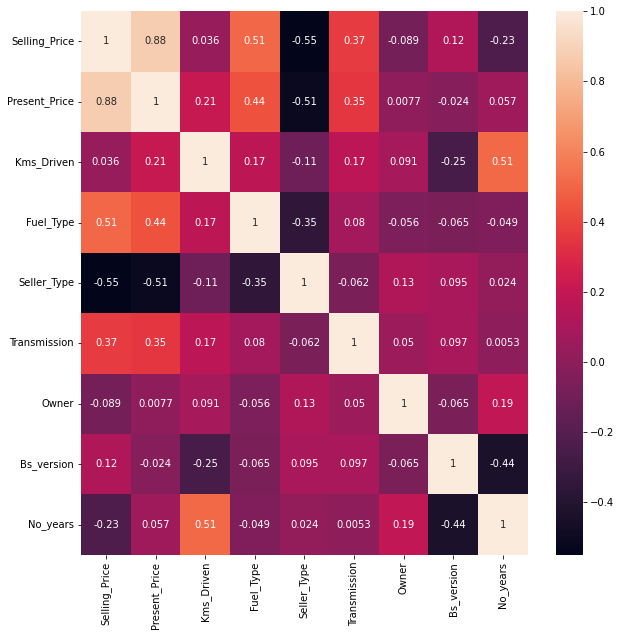

In [120]:
plt.figure(figsize=(10,10))
sns.heatmap(final_dataset.corr(),annot=True)

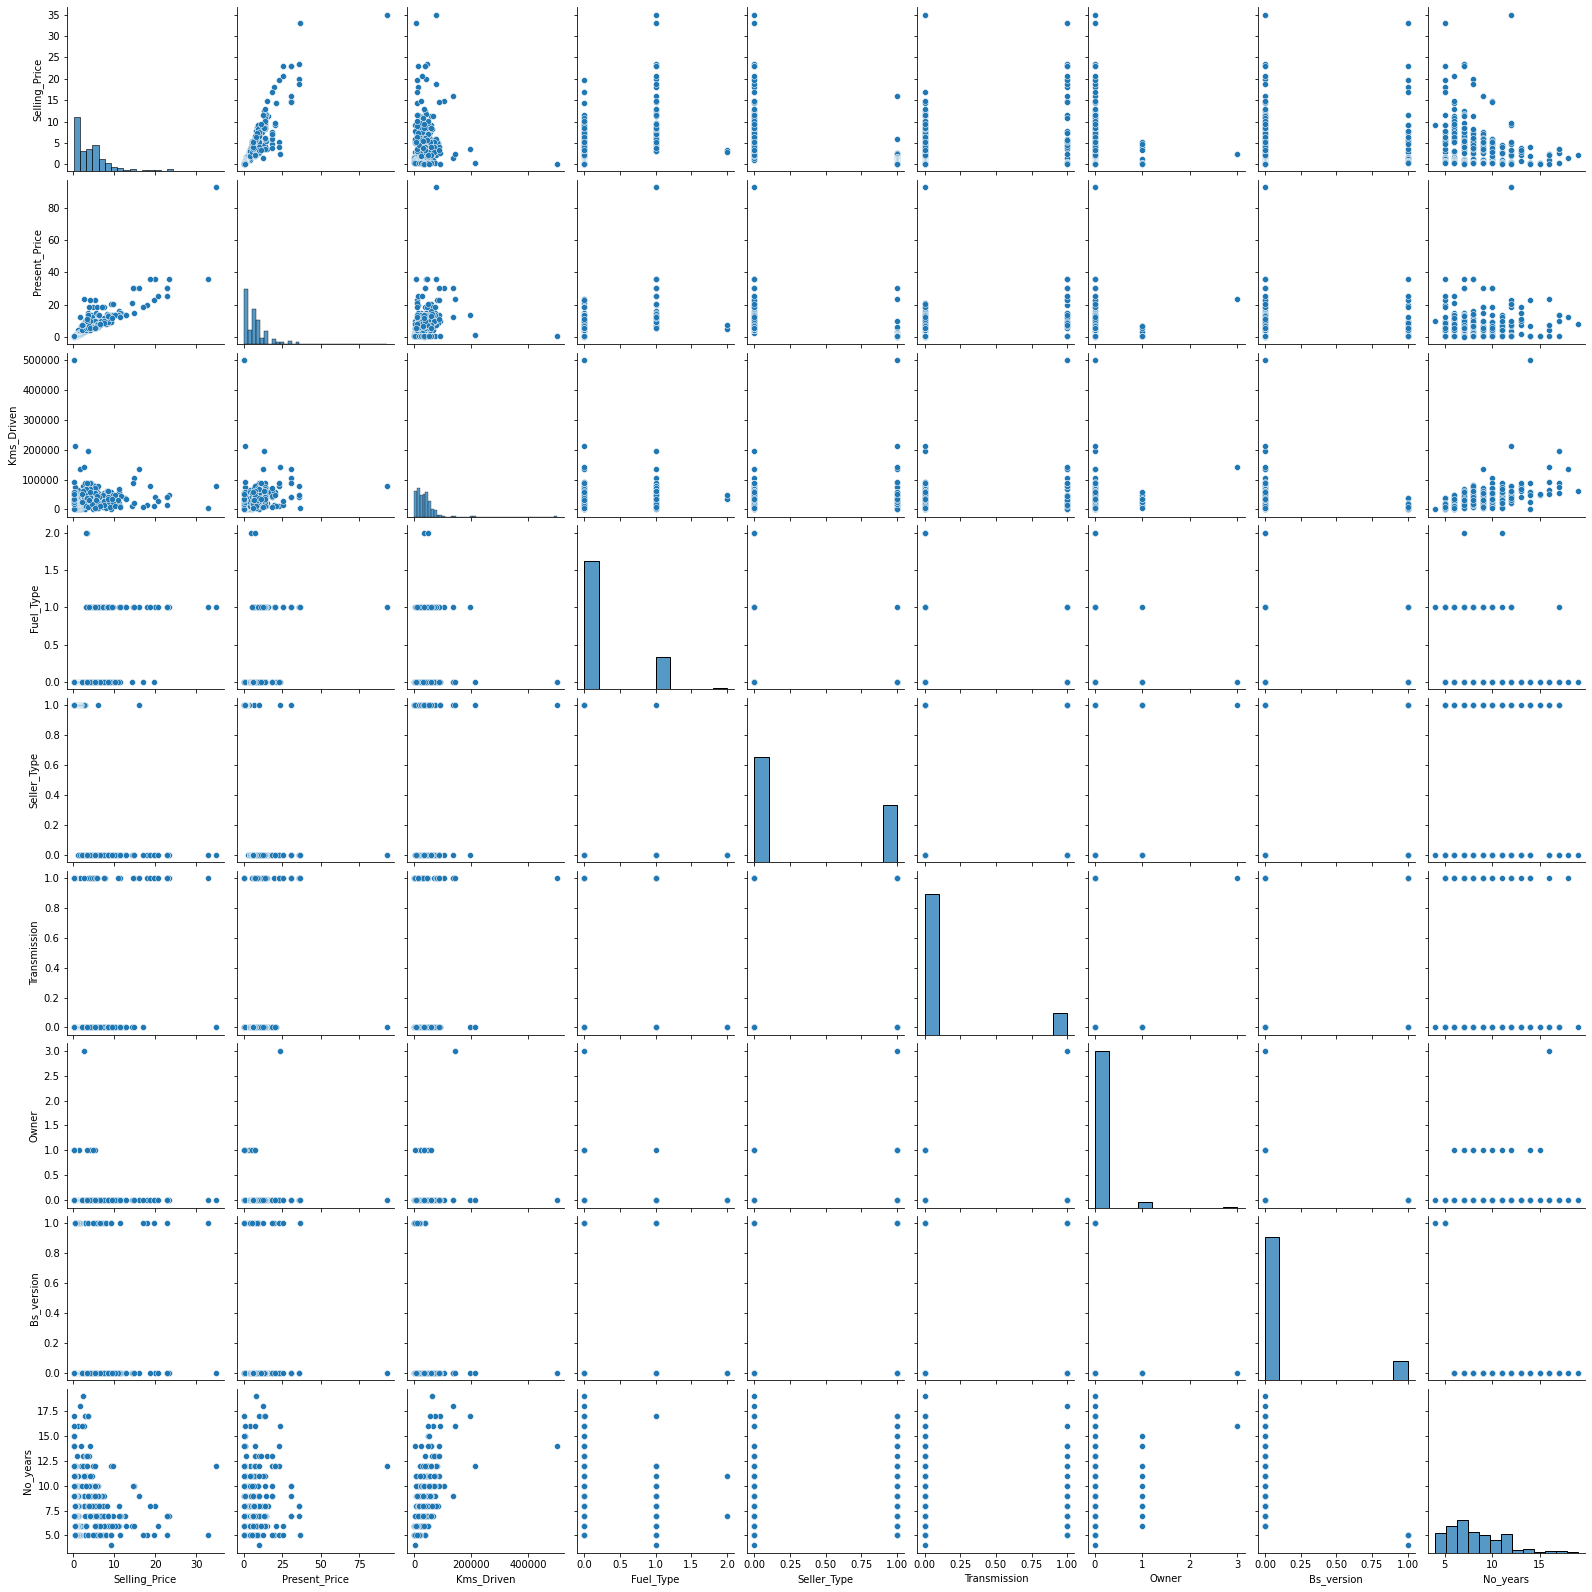

In [121]:
sns.pairplot(final_dataset)

<AxesSubplot:>

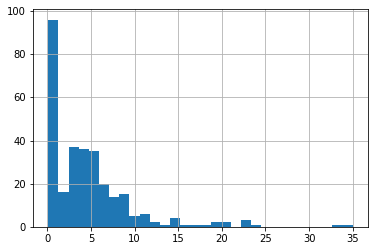

In [122]:
final_dataset['Selling_Price'].hist(bins=30)

#Divide x and y

In [123]:
X = final_dataset.drop(['Selling_Price'],axis=1)
Y = final_dataset['Selling_Price']

In [124]:
X

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Bs_version,No_years
0,5.59,27000,0,0,0,0,0,8
1,9.54,43000,1,0,0,0,0,9
2,9.85,6900,0,0,0,0,1,5
3,4.15,5200,0,0,0,0,0,11
4,6.87,42450,1,0,0,0,0,8
...,...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,0,6
297,5.90,60000,0,0,0,0,0,7
298,11.00,87934,0,0,0,0,0,13
299,12.50,9000,1,0,0,0,1,5


In [125]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 300, dtype: float64

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

#Show the important attributes in descending order

In [127]:
best_features = SelectKBest(score_func=f_regression, k='all')
top_features = best_features.fit(X_train,Y_train)
scores = pd.DataFrame(top_features.scores_)
columns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([columns, scores], axis=1)
featureScores.columns = ['Features','Scores']
print(featureScores.nlargest(8, 'Scores'))

        Features      Scores
0  Present_Price  943.638710
2      Fuel_Type  102.155403
3    Seller_Type   95.370550
4   Transmission   41.408074
7       No_years   13.122791
5          Owner    3.542783
6     Bs_version    2.577471
1     Kms_Driven    0.239744


#Plot graph of feature importances for better visualization

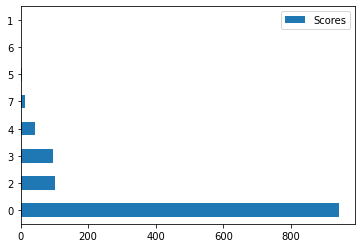

In [128]:
featureScores.nlargest(8,'Scores').plot(kind='barh')
plt.show()

####Create function to displaying scores

In [129]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

#1.Training the Random Forest Regressor

In [130]:
print("Random Forest Regressor Scores")
scores = cross_val_score(rr, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
random_forest_scores = np.sqrt(-scores)
display_scores(random_forest_scores)
print("\n")

Random Forest Regressor Scores
Scores:  [2.38183048 1.57313296 2.02367926 0.95724331 1.20912833]
Mean:  1.629002868395856
Standard Deviation:  0.520229918289089




#2.Training the Gradient Boosting Regressor

In [156]:
print('Gradient Boosting Regressor Scores')
scores = cross_val_score(gbr, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
gradient_boosting_regressor = np.sqrt(-scores)
display_scores(gradient_boosting_regressor)
print("\n")

Gradient Boosting Regressor Scores
Scores:  [2.54100228 1.10162348 1.81280957 0.77745437 1.27447753]
Mean:  1.5014734436043171
Standard Deviation:  0.6185727360635986




#3.Training the Linear Regression


In [132]:
print('Linear Regression Scores')
scores = cross_val_score(lr, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
linear_regression = np.sqrt(-scores)
display_scores(linear_regression)
print("\n")

Linear Regression Scores
Scores:  [2.76585739 1.82436854 2.31677308 1.58011901 2.07951119]
Mean:  2.113325842742346
Standard Deviation:  0.4089345854476109




#4.Training the Extreme Gradient Boosting

In [157]:
print("xGB Scores")
scores = cross_val_score(xgb, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
xgb_regressor = np.sqrt(-scores)
display_scores(xgb_regressor)
print("\n")

xGB Scores
Scores:  [2.22282172 1.25247825 1.89708487 0.85713663 1.20831444]
Mean:  1.487567183221554
Standard Deviation:  0.49779424472135525




#From our training model, Extreme Gradient Boosting has the best performance with the lower mean error. With this, we will used them for the prediction.

In [158]:
xg_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.15,
                max_depth = 5,n_estimators = 10)
xg_reg.fit(X_train.values,Y_train.values)

predictions= xg_reg.predict(X_test.values)
rmse = np.sqrt(mean_squared_error(Y_test,predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.946699


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

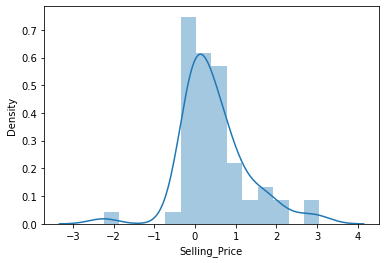

In [135]:
sns.distplot(Y_test-predictions)

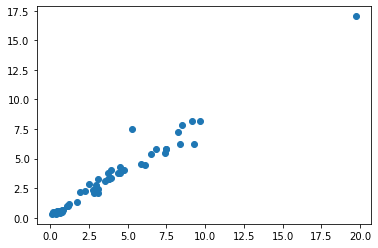

In [136]:
plt.scatter(Y_test,predictions)

In [159]:
print('Accuracy:',r2_score(Y_test,predictions)*100)
print('Mean Absolute Error:', round(mean_absolute_error(Y_test, predictions),2))
print('Mean Squared Error:', round(mean_squared_error(Y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(Y_test, predictions)),2))

Accuracy: 92.61998304967463
Mean Absolute Error: 0.62
Mean Squared Error: 0.9
Root Mean Squared Error: 0.95


As Accuracy is 92 % which is acceptable

In [138]:
predictions

array([ 8.136272  ,  8.184364  ,  0.3669785 ,  7.839867  ,  5.7700453 ,
        2.4225588 ,  5.403127  ,  4.483092  ,  6.1888256 ,  3.1156504 ,
        5.465679  ,  0.63066554,  3.2615864 ,  3.7631516 ,  0.99791193,
        2.8785853 ,  1.293463  ,  0.5585141 ,  0.4623213 ,  4.57476   ,
        2.7935207 ,  2.1231403 ,  0.3492197 ,  0.4856887 ,  2.42352   ,
        3.2483592 ,  2.3699224 ,  0.4623213 ,  6.1888256 ,  7.205902  ,
        0.63066554,  2.1143448 ,  5.7700453 ,  0.5344728 ,  0.4121384 ,
        0.4623213 ,  3.2615864 ,  3.7631516 ,  4.048271  ,  1.158035  ,
        0.45998332, 17.031517  ,  2.1759253 ,  5.7700453 ,  3.7631516 ,
        4.048271  ,  0.49240753,  0.99791193,  7.498913  ,  0.39706463,
        2.42352   ,  2.2892845 ,  0.39706463,  4.2857795 ,  0.5344728 ,
        2.2589674 ,  0.4856887 ,  0.31913358,  3.359088  ,  0.4121384 ],
      dtype=float32)

In [139]:
# open a file, where you ant to store the data
file = open('xGBoost_model.pkl', 'wb')

# dump information to that file
pickle.dump(xg_reg, file)

In [140]:
loaded_model = pickle.load(open("xGBoost_model.pkl", "rb"))

In [141]:
loaded_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)